Functions in Python
====

## Unit 6, Lecture 3

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 22 2018

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib

Defining Functions
===

Sometimes it's nice to use functions instead of writing the equation for a geometric distribution each time.

Function Definition
====

You may define your own functions using the `def` command.

In [2]:
def print_hello():
    print('Hello')

print_hello()

Hello


You may give arguments by putting them inside the `()`. Like this:

In [3]:
def print_string(s):
    print(s) # <--- I can now use s anywhere inside the function

print_string('Go dog')
print_string('See dog go')

Go dog
See dog go


What if you want to return something? You can, with the `return` function.

In [4]:
def square(x):
    return x * x

x_squared = square(2)
print(x_squared)

4


What is the difference between returning and printing?
---

In [5]:
def square_print(x):
    print(x * x)

square_print(5) * 4

25


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [6]:
square(5) * 4

100

You can pass multple arguments and your function can be multiple lines, just like `for` loops and `if` statements.

In [5]:
def geometric(n, p):
    P_n = (1 - p)**(n - 1) * p
    return P_n 
geometric(5, 0.1)

0.06561

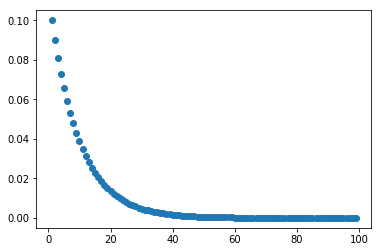

In [6]:
Q = np.arange(1,100)
plt.plot(Q, geometric(Q, 0.1), 'o')
plt.show()

Documenting Your Function
----

You can make your own documentation. Use the `'''` instead of just one `'` so that you can use multiple lines


In [7]:
def my_geom(n, p=0.5):
        '''This function will compute the probability of n from a geometric distribution given p
        
        Args:
            p: The probability of success
            n: The number of times before and including success
            
        returns: the probability'''
        return (1 - p)**(n - 1)* p

In [8]:
help(my_geom)

Help on function my_geom in module __main__:

my_geom(n, p=0.5)
    This function will compute the probability of n from a geometric distribution given p
    
    Args:
        p: The probability of success
        n: The number of times before and including success
        
    returns: the probability



Notice I used a default value for `p`

In [9]:
my_geom(n=4)

0.0625

Notice I used the name of the argument with the `n=4`. This is called a *named argument*. You can mix the use of named arguments and *positional arguments* interchangably. Positional arguments are just regular arguments. For example:

In [38]:
my_geom(3, p=0.3)

0.14699999999999996

There is one rule though, you must put positional arguments **before** named arguments. For example, this will not work:

In [39]:
my_geom(n=3, 0.2)

SyntaxError: positional argument follows keyword argument (<ipython-input-39-c496f4e9a124>, line 1)

Things to consider in creating a fucntion
----

1. Write the signature and doc string describing what your function should do and its input/output
2. Write a function that generates correct output for most inputs
3. Consider edge cases and possible user error
4. Validate for numpy (optional)

Example
---

For our example, we'll write a function that computes the Fibonacci sequence up to the $n$th term. The Fibonacci sequence is a sequence whose $n$th element is the sum of the $n-1$ and $n-2$ elements. The first two elements are defined to be $1$. Here's the first few terms:

$$
1,\,1,\,2,\,3,\,5,\,8
$$

So our function should return `5` if it is passed `4` (first term is indexed as `0`). 

Write doc string
---

In [10]:
def fib():
    '''Returns the nth element from the Fibonacci sequence
    
    '''

Define the input/output
----

We decide only 1 input is necessary

In [11]:
def fib(i):
    '''Returns the nth element from the Fibonacci sequence

        Args:
            i: the index of the element in the Fibonacci sequence    

        returns: the element at the given index in the Fibonacci sequence
    '''

Make it work
---

Now we actually test it out! I'll omit the docstring to make the slides easier to view. We should use inline comments with a `#` to indicate our logic in the program

In [12]:
def fib_1(i):
    last = 1 # our n - 1 element
    last_last = 1 # our n -2 element
    for j in range(i): #go until we are at the ith element
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [13]:
fib_1(4)

8

It looks pretty good! Except, it is off by 1 from our original example.

In [14]:
def fib_2(i):
    last = 1 # our n - 1 element
    last_last = 1 # our n -2 element
    #sub 1 because last and last_last
    #are set corresponding to n=2
    for j in range(i - 1): 
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [15]:
fib_2(4)

5

In [16]:
fib_2(5)

8

In [17]:
fib_2(6)

13

Looks like it works on our original example

Consider Edge Case
---

How does it deal with the starting point?

In [18]:
fib_2(0)

UnboundLocalError: local variable 'current' referenced before assignment

In [19]:
fib_2(1)

UnboundLocalError: local variable 'current' referenced before assignment

In [20]:
fib_2(2)

2

In [21]:
def fib_3(i):
    
    #deal with edge cases
    if i == 0 or i == 1:
        return 1
    
    last = 1 # our n - 1 element
    last_last = 1 # our n -2 element
    #sub 1 because last and last_last
    #are set corresponding to n=2
    for j in range(i - 1): 
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [22]:
fib_3(0)

1

Deal with use error
----

Make your function easy to use by gracefully dealing with bad input conditions.

In [23]:
def fib_4(i):
    
    #check that i is valid
    if(type(i) != int or i < 0):
        return None
    
    #deal with edge cases
    if i == 0 or i == 1:
        return 1
    
    last = 1 # our n - 1 element
    last_last = 1 # our n -2 element
    #sub 1 because last and last_last
    #are set corresponding to n=2
    for j in range(i - 1): 
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [24]:
print(fib_4(-4))

None


In [25]:
print(fib_4('fdsa'))

None


In [26]:
fib_4(8)

34

Dealing with user error is a fascinating topic and gets into user interface design, which is covered nicely in this [introductory video](https://www.youtube.com/watch?v=r2CbbBLVaPk) from the web design community. 

How to convert a function into a numpy function
====

`np.vectorize(fxn)` will turn your function into a numpy version. You pass it your function (`fxn`) and it returns a new function which is yours but upgraded to work on numpy arrays.

In [27]:
import numpy as np
from math import sin

#Don't actually do this, this is an example. Just use np.sin instead.
my_np_sin = np.vectorize(sin) #<-- I'm turning the math sine into my own version

x = np.linspace(0,3,5)
print(my_np_sin(x))

[ 0.          0.68163876  0.99749499  0.7780732   0.14112001]


In [28]:
def my_distribution(x):
    '''my special snowflake distribution'''
    if x > 40:
        return 0.2
    else:
        return 0.8

x = np.linspace(0,100,10)
print(my_distribution(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
numpy_version_distribution = np.vectorize(my_distribution)
print(numpy_version_distribution(x))

[ 0.8  0.8  0.8  0.8  0.2  0.2  0.2  0.2  0.2  0.2]


What happened with the doc string though? You can only access it through the `np.info`, instead of `help`

In [30]:
np.info(numpy_version_distribution)

my special snowflake distribution


This is not always necessary - usually only needed when working with loops and `if` statements. 

In [31]:
def foo(x):
    return 2 ** x
data = np.linspace(1,2,10)

print(foo(data))

[ 2.          2.16011948  2.33305808  2.5198421   2.72158     2.93946898
  3.1748021   3.42897593  3.70349885  4.        ]


Revise
----

It's always good to revise your functions after considering each of these aspects. Let's say we want our Fibonacci function to be capable of specifying the starting point? That would require specifying two values.

In [32]:
def fib_5(i, start=(1,1)):
    
    #check that i is valid
    if(type(i) != int or i < 0):        
        return None
    
    #deal with edge cases
    if i == 0:
        return start[0]
    if i == 1:
        return start[1]
    
    last = start[0] # our n - 1 element
    last_last = start[1] # our n -2 element
    #sub 1 because last and last_last
    #are set corresponding to n=2
    for j in range(i - 1): 
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [33]:
fib_5(2, start=(1, 2))

3

Now we'll put it all together with numpy and the doc string

In [34]:
def py_fib(i, start=(1,1)):
    '''Returns the nth element from the Fibonacci sequence

        Args:
            i: the index of the element in the Fibonacci sequence    
            start: the first and second elements of the sequence. Default is 1,1

        returns: the element at the given index in the Fibonacci sequence
    '''
    #check that i is valid
    if(type(i) != int or i < 0):        
        return None
    
    #deal with edge cases
    if i == 0:
        return start[0]
    if i == 1:
        return start[1]
    
    last = start[0] # our n - 1 element
    last_last = start[1] # our n -2 element
    #sub 1 because last and last_last
    #are set corresponding to n=2
    for j in range(i - 1): 
        current = last + last_last #the add
        last_last = last #our new n - 2
        last = current # our new n - 1
    return current

In [35]:
#you can specifiy that it returns integers
#to simplifiy your output
fib = np.vectorize(py_fib, otypes=[np.int])

In [36]:
i = np.arange(10)
fib(i)

array([ 1,  1,  2,  3,  5,  8, 13, 21, 34, 55])

In [37]:
np.info(fib)

Returns the nth element from the Fibonacci sequence

Args:
    i: the index of the element in the Fibonacci sequence    
    start: the first and second elements of the sequence. Default is 1,1

returns: the element at the given index in the Fibonacci sequence
